In [1]:
import pandas as pd

# Load the Excel file and skip the first two rows
file_path = r'C:\Users\khmir\Desktop\SPN internship\sprint 1\data from spn\List of cars.xlsx'
df = pd.read_excel(file_path, skiprows=2)

# Remove the first two rows (0 and 2 are indices to be removed)
df = df.drop([0, 2]).reset_index(drop=True)

# Set the correct column names
df.columns = ['Modèle', 'Numéro de plaque', 'Date 1er circulation', 'Prix', 'Empty', 'Nom', 'Prix Annuel']
df['CAR'] = df['Modèle'] + '_' + df['Numéro de plaque']

# Drop the original columns if needed
# df.drop(['Modèle', 'Numéro de plaque'], axis=1, inplace=True)

# Remove 'CHF' from 'Prix Annuel' column and convert to numeric
df['Prix Annuel'] = pd.to_numeric(df['Prix Annuel'].str.replace('CHF', '').str.strip())

# Drop the 'Empty' column as it's not needed
df = df.drop(columns=['Empty'])

# Remove any remaining rows where 'Modèle' is NaN (cleanup for any residual header rows)
df = df.dropna(subset=['Modèle']).reset_index(drop=True)

# Display the first few rows of the cleaned dataframe
print("First few rows of the cleaned dataset:")
print(df.head())

# Display basic information about the cleaned dataframe
print("\nBasic information about the cleaned dataset:")
print(df.info())

# Display summary statistics of the cleaned dataframe
print("\nSummary statistics of the cleaned dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the cleaned dataset:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows in the cleaned dataset:")
print(df.duplicated().sum())


First few rows of the cleaned dataset:
                   Modèle Numéro de plaque Date 1er circulation   Prix  \
0  Mercedes-Benz V-Klasse        GE 963724           2023-02-01  86400   
1   Mercedes-Benz V 250 D        GE 963723           2022-06-30  81700   
2      Mercedes-Benz V250        GE 963726           2022-08-12  81700   
3   Mercedes-Benz V 250 D        GE 305362           2023-06-21    NaN   
4  Mercedes-Benz V-Klasse        GE 315431           2023-05-22  90400   

        Nom  Prix Annuel                               CAR  
0    Zurich       2987.9  Mercedes-Benz V-Klasse_GE 963724  
1  Vaudoise          NaN   Mercedes-Benz V 250 D_GE 963723  
2  Vaudoise          NaN      Mercedes-Benz V250_GE 963726  
3    Zurich       2987.9   Mercedes-Benz V 250 D_GE 305362  
4    Zurich       2987.9  Mercedes-Benz V-Klasse_GE 315431  

Basic information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #

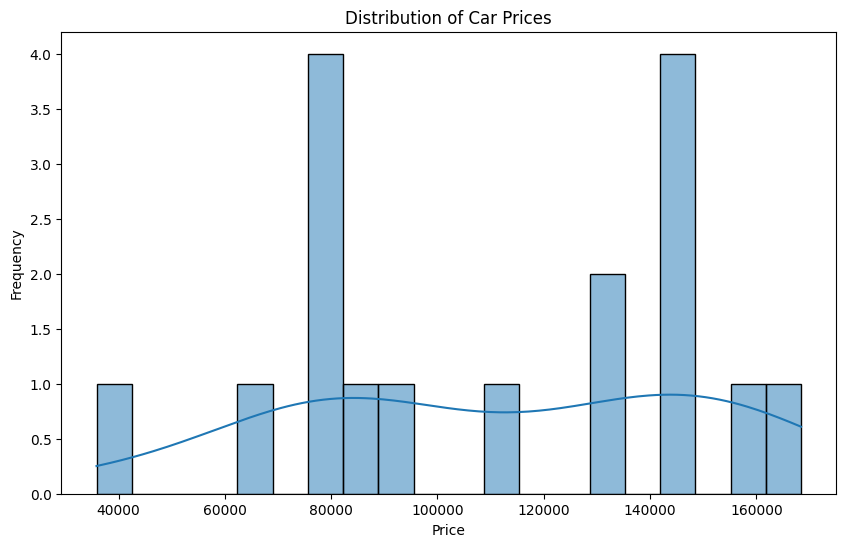

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


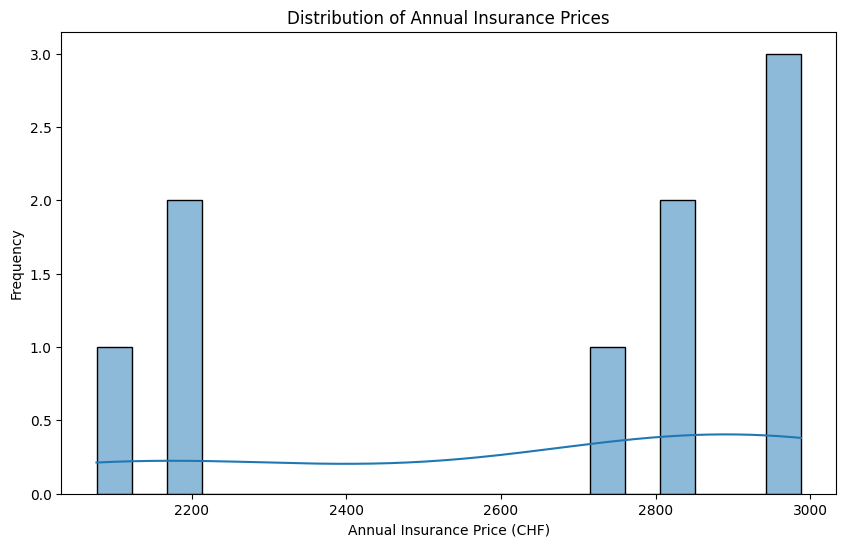

In [3]:

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix Annuel'], bins=20, kde=True)
plt.title('Distribution of Annual Insurance Prices')
plt.xlabel('Annual Insurance Price (CHF)')
plt.ylabel('Frequency')
plt.show()


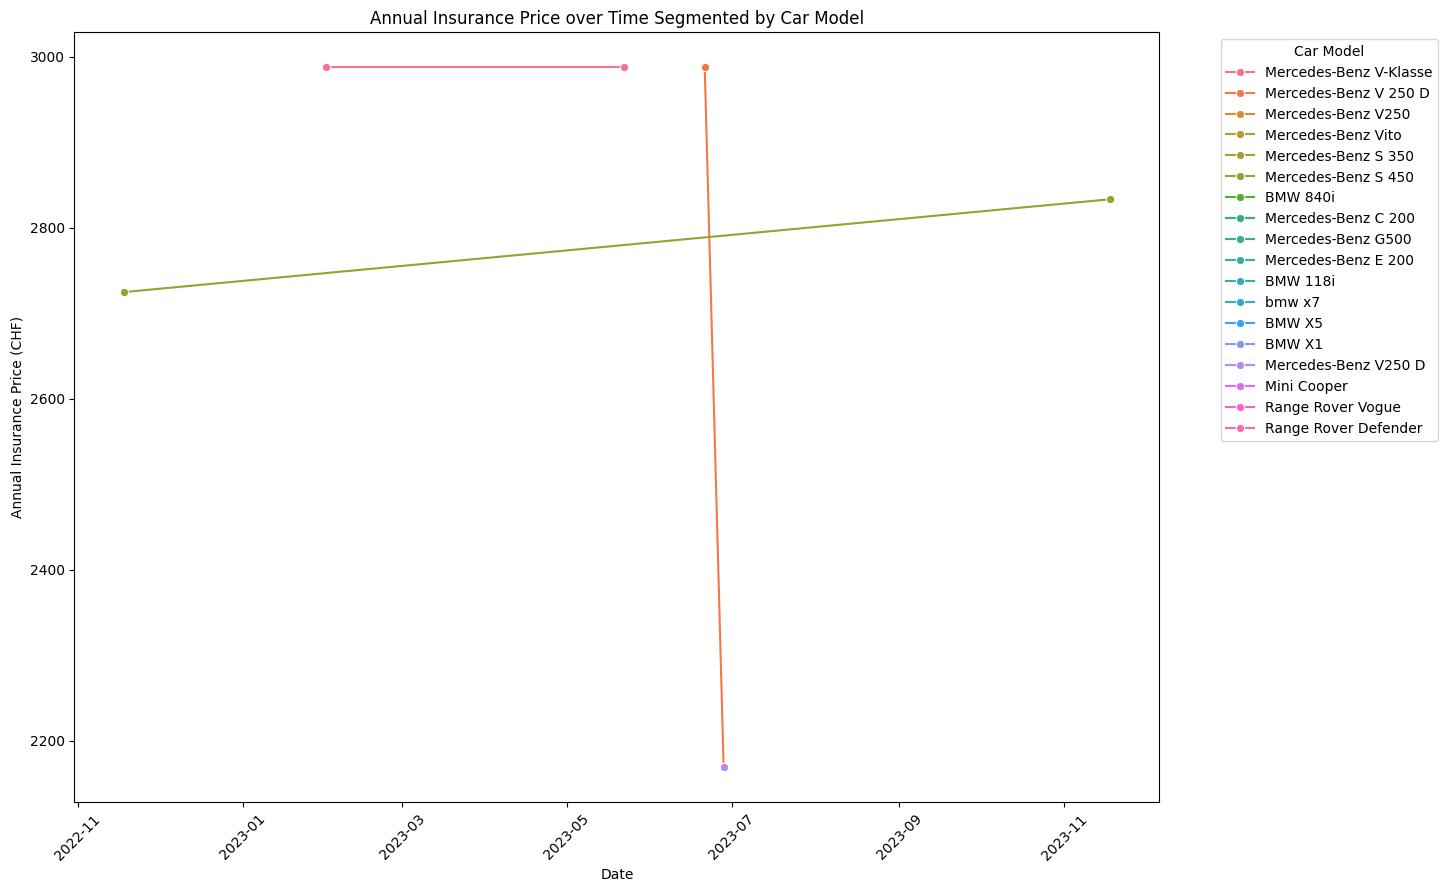

In [4]:
# Segmented Line Plot: Annual insurance price over time segmented by car model
plt.figure(figsize=(14, 10))
sns.lineplot(x='Date 1er circulation', y='Prix Annuel', hue='Modèle', data=df, marker='o')
plt.title('Annual Insurance Price over Time Segmented by Car Model')
plt.xlabel('Date')
plt.ylabel('Annual Insurance Price (CHF)')
plt.xticks(rotation=45)
plt.legend(title='Car Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


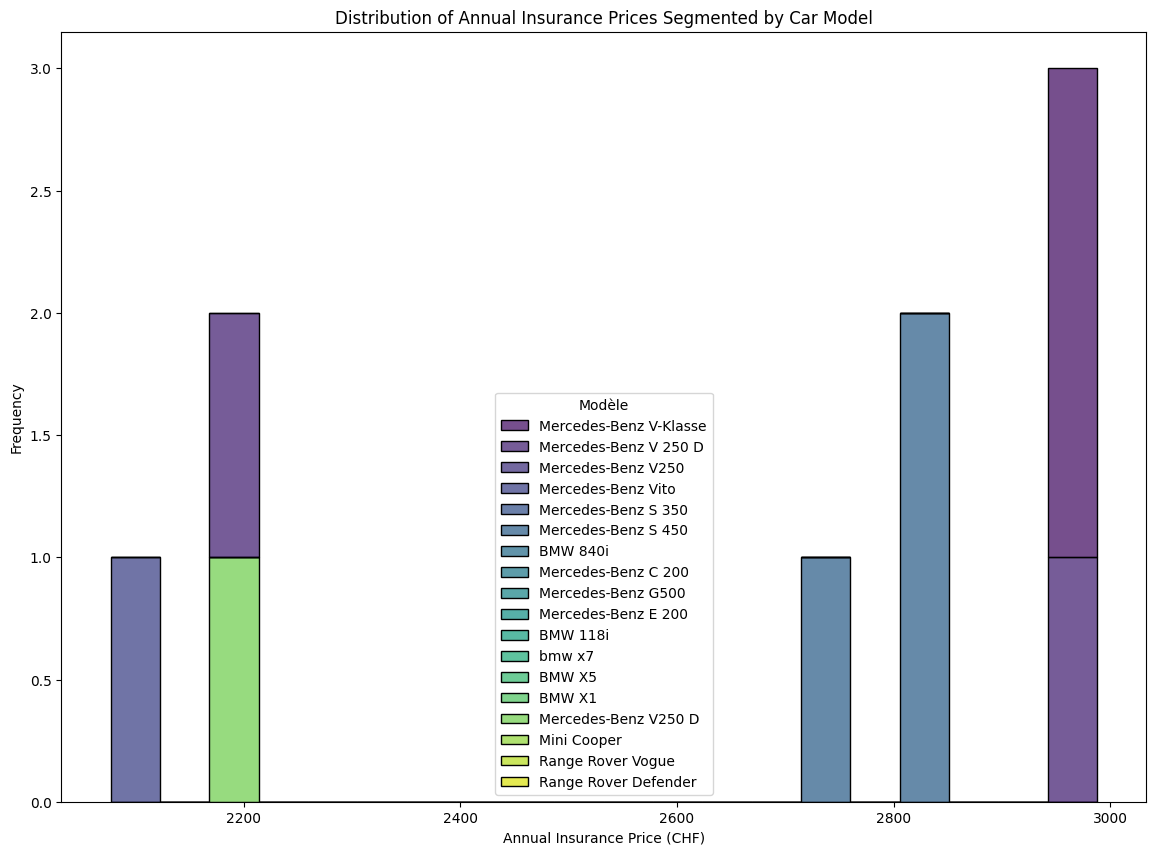

In [5]:
# Histogram: Distribution of annual insurance prices segmented by car model
plt.figure(figsize=(14, 10))
sns.histplot(df, x='Prix Annuel', hue='Modèle', multiple='stack', palette='viridis', bins=20)
plt.title('Distribution of Annual Insurance Prices Segmented by Car Model')
plt.xlabel('Annual Insurance Price (CHF)')
plt.ylabel('Frequency')
plt.show()


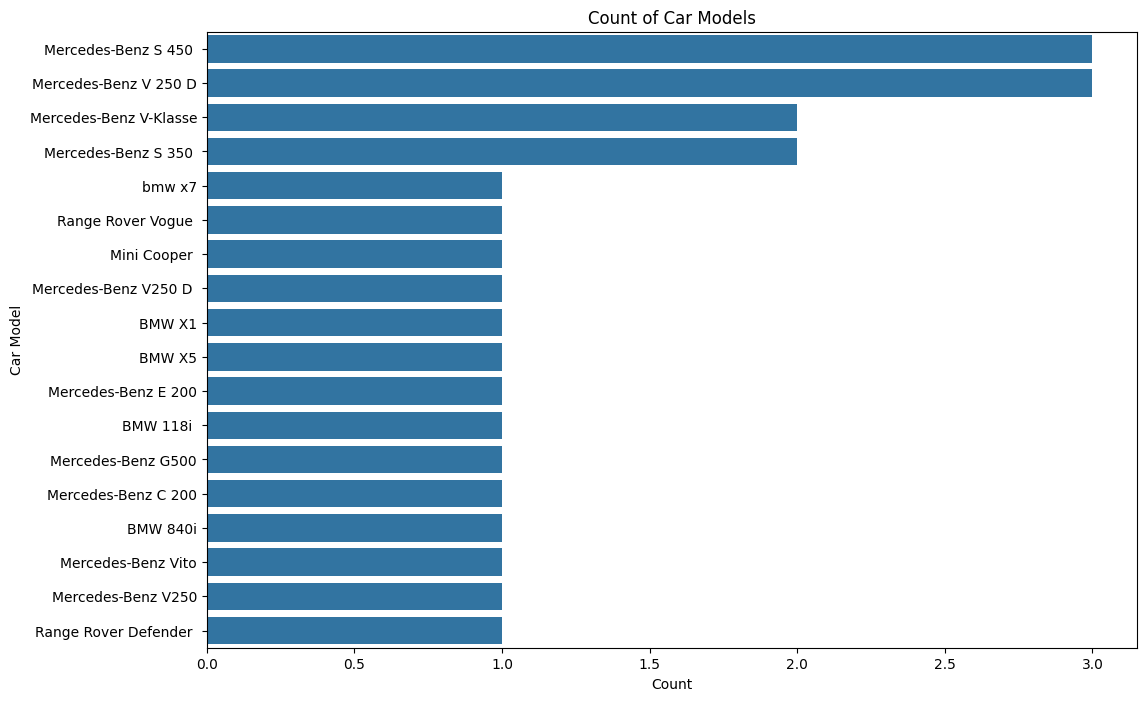

In [6]:
# Count plot of car models
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Modèle'], order=df['Modèle'].value_counts().index)
plt.title('Count of Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()


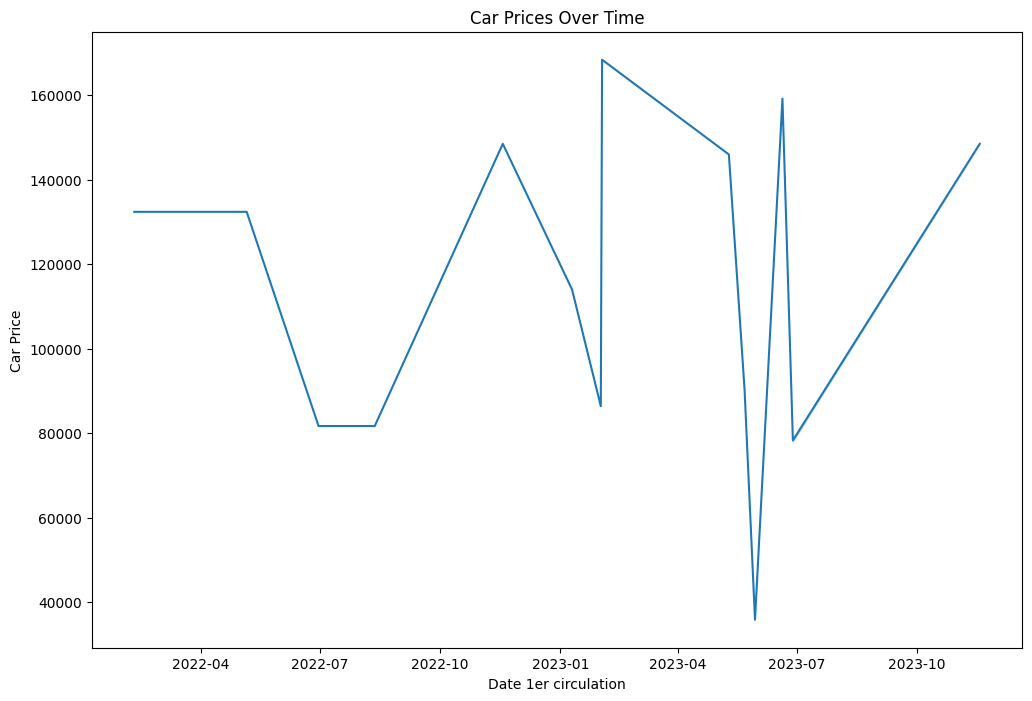

In [7]:
# Convert 'Date 1er circulation' to datetime format
df['Date 1er circulation'] = pd.to_datetime(df['Date 1er circulation'])

# Line plot of car prices over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date 1er circulation', y='Prix', data=df)
plt.title('Car Prices Over Time')
plt.xlabel('Date 1er circulation')
plt.ylabel('Car Price')
plt.show()


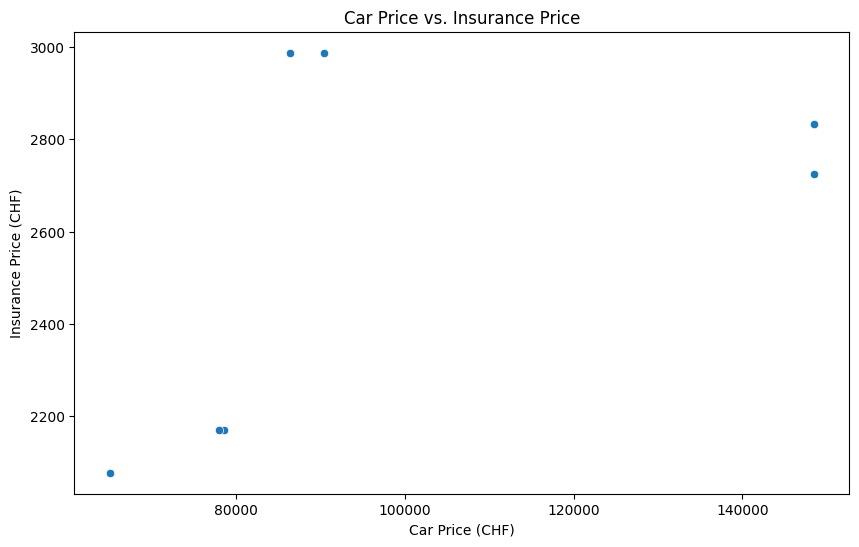

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your cleaned DataFrame

# Convert 'Prix' and 'Prix Annuel' columns to numeric, coercing errors to NaN
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
df['Prix Annuel'] = pd.to_numeric(df['Prix Annuel'], errors='coerce')

# Remove 'CHF' from 'Prix' and 'Prix Annuel' columns if there are any string values left
df['Prix'] = df['Prix'].astype(str).str.replace('CHF', '').str.strip()
df['Prix Annuel'] = df['Prix Annuel'].astype(str).str.replace('CHF', '').str.strip()

# Convert back to numeric after removing 'CHF'
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
df['Prix Annuel'] = pd.to_numeric(df['Prix Annuel'], errors='coerce')

# Plotting the relationship between Car Price and Insurance Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prix', y='Prix Annuel', data=df)
plt.title('Car Price vs. Insurance Price')
plt.xlabel('Car Price (CHF)')
plt.ylabel('Insurance Price (CHF)')
plt.show()


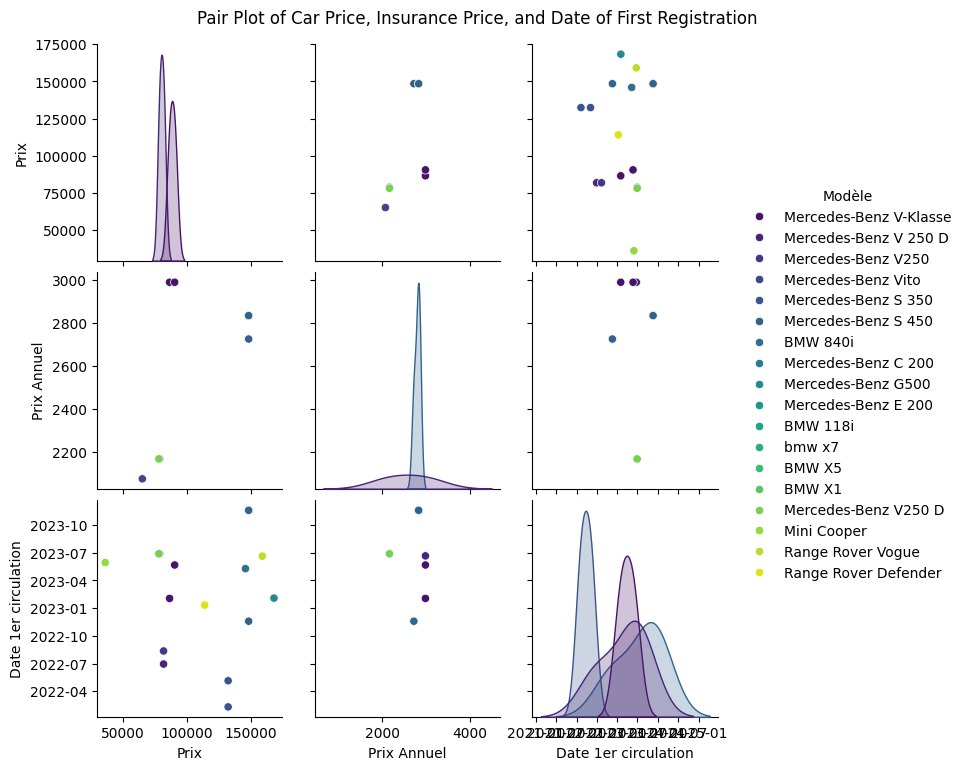

In [9]:
sns.pairplot(df, vars=['Prix', 'Prix Annuel', 'Date 1er circulation'], hue='Modèle', palette='viridis')
plt.suptitle('Pair Plot of Car Price, Insurance Price, and Date of First Registration', y=1.02)
plt.show()


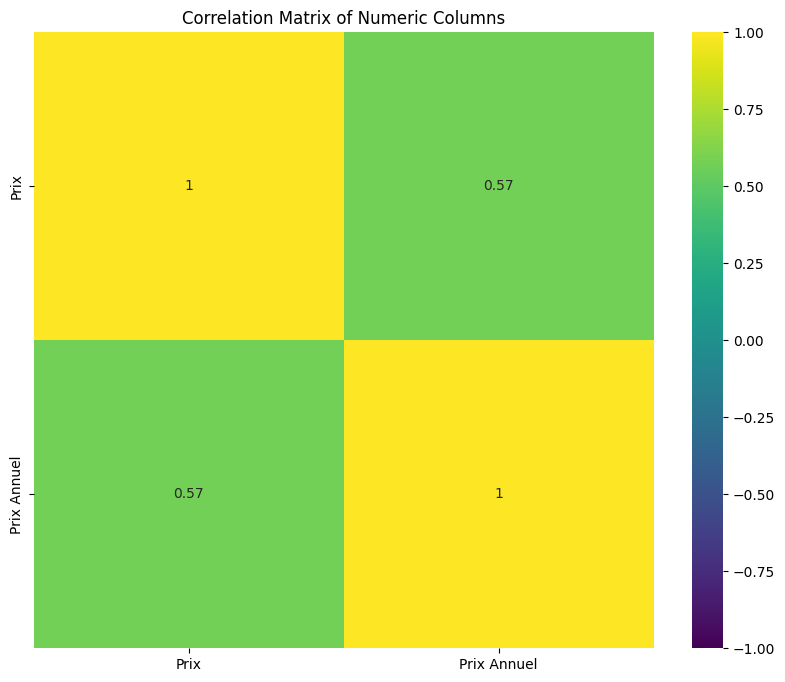

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Prix', 'Prix Annuel']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


C:\Users\khmir\AppData\Local\Temp\ipykernel_8064\2396523127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Modèle', y='Prix', data=df, palette='viridis')


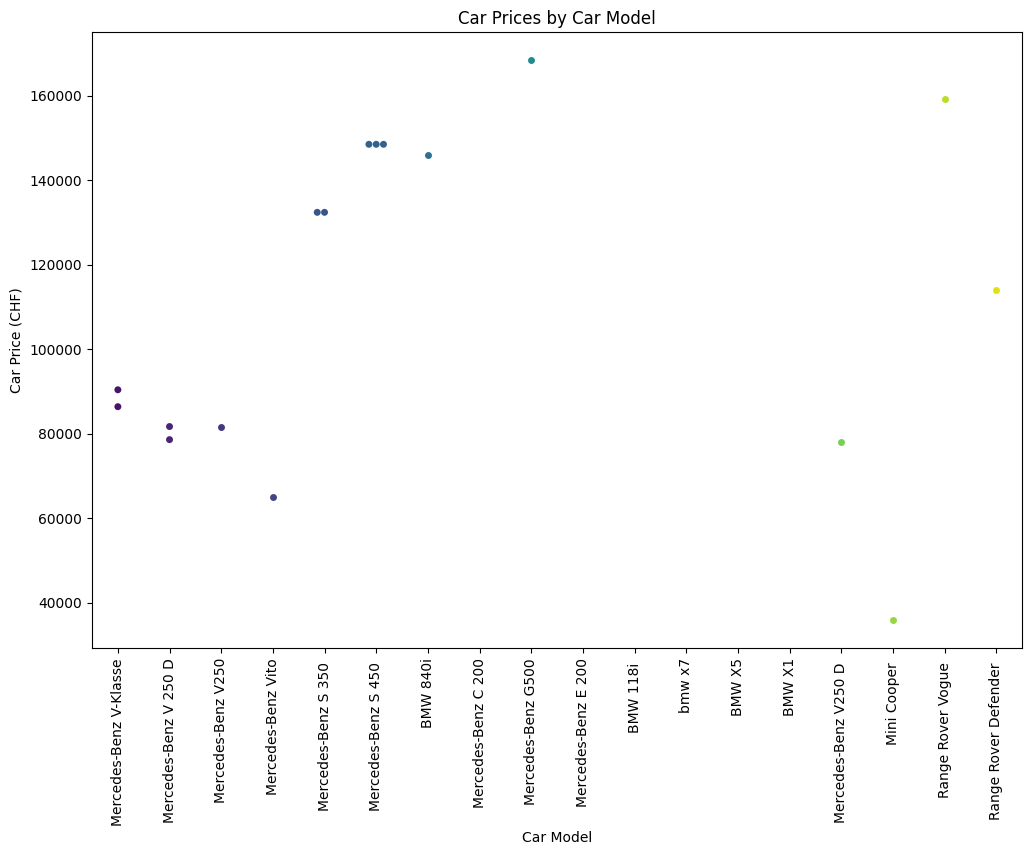

In [11]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Modèle', y='Prix', data=df, palette='viridis')
plt.title('Car Prices by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Car Price (CHF)')
plt.xticks(rotation=90)
plt.show()


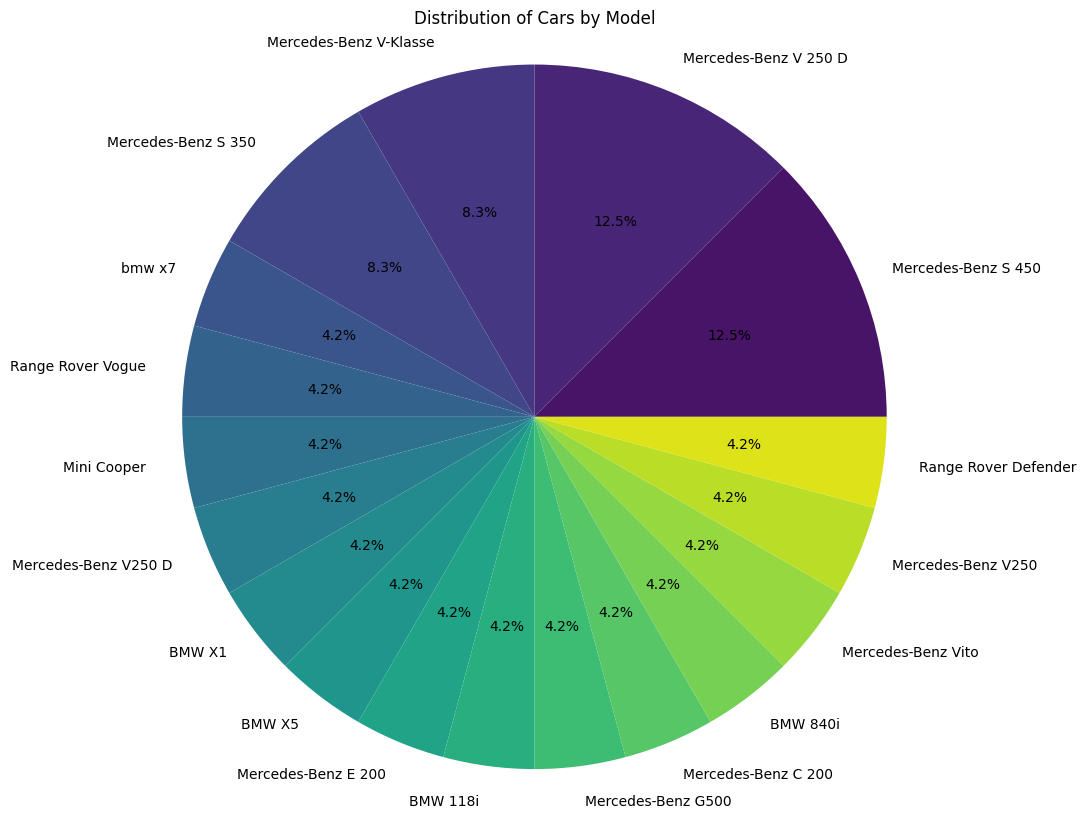

In [12]:
plt.figure(figsize=(10, 10))
car_model_counts = df['Modèle'].value_counts()
plt.pie(car_model_counts, labels=car_model_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(car_model_counts)))
plt.title('Distribution of Cars by Model')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


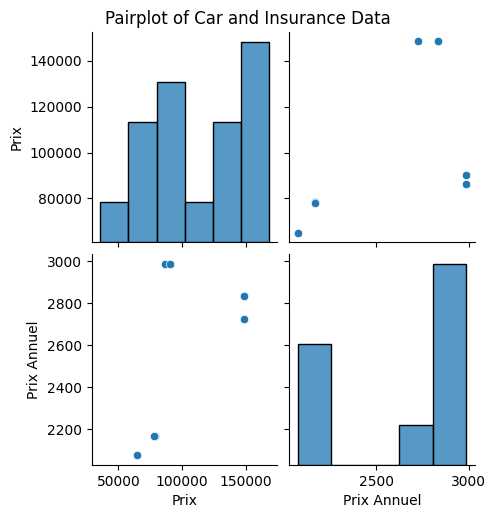

In [13]:
# Pairplot to explore relationships between all numeric variables
sns.pairplot(df)
plt.suptitle('Pairplot of Car and Insurance Data', y=1.02)
plt.show()


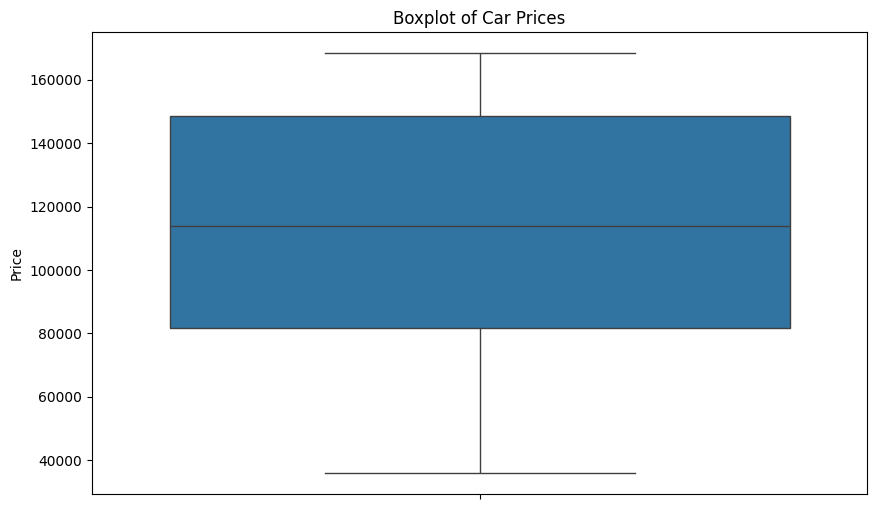

In [14]:
# Boxplot of car prices
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Prix'])
plt.title('Boxplot of Car Prices')
plt.ylabel('Price')
plt.show()
